In [1]:
## Library which needs to be installed
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install bertopic
!pip install sentence_transformers
!pip install umap-learn
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 25.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 22.0 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from bertopic import BERTopic
from google.colab import drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')# %cd drive/Mydrive
%cd drive/MyDrive/Grover_dataset/
jsonl_file_path = 'generator=mega~dataset=p1.00.jsonl'
df = pd.read_json(jsonl_file_path, lines=True)


Mounted at /content/drive
/content/drive/MyDrive/Grover_dataset


In [5]:
df.head(3)

,article,domain,title,date,authors,ind30k,url,label,orig_split,split,random_score,top_p
0,Patrons crowd the platform at the Washington M...,theepochtimes.com,US Senators Threaten Metro Funding Over Chines...,2019-04-15,None,29363,https://www.theepochtimes.com/us-senators-thre...,human,train_burner,train,-4.263557,NaN
1,\nSource: Houston Ship Channel Helicopter Oper...,seekingalpha.com,Supply Fundamentals Point To Continued Oil Rally,2019-04-12,Atlas Grinned,4999,https://seekingalpha.com/article/4254101-suppl...,machine,gen,train,NaN,1.0
2,In December 2018 the issue of why the Canadian...,ottawacitizen.com,Military assessment ruling out the need for a ...,2019-04-16,Updated,23090,https://ottawacitizen.com/news/national/defenc...,human,train_burner,train,-3.863624,NaN


In [6]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
## topics and predict probs for each cluster
topics, probs = topic_model.fit_transform(df["title"][:5000])


2024-04-23 18:59:54,724 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2024-04-23 19:00:19,943 - BERTopic - Embedding - Completed ✓
2024-04-23 19:00:19,944 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-23 19:00:53,640 - BERTopic - Dimensionality - Completed ✓
2024-04-23 19:00:53,641 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-23 19:00:55,428 - BERTopic - Cluster - Completed ✓
2024-04-23 19:00:55,437 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-23 19:00:55,652 - BERTopic - Representation - Completed ✓


In [7]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2057,-1_to_of_in_for,"[to, of, in, for, the, and, on, with, from, new]",[Wendy Williams reveals she is moving out of h...
1,0,138,0_league_united_arsenal_liverpool,"[league, united, arsenal, liverpool, utd, newc...",[Man Utd legend Sir Alex Ferguson picks betwee...
2,1,121,1_coachella_music_song_album,"[coachella, music, song, album, concert, arian...",[Ariana Grande Says She Likes ‘Women & Men’ In...
3,2,115,2_easter_this_food_april,"[easter, this, food, april, week, recipes, fes...","[8 things to do with your kids this weekend, N..."
4,3,103,3_housing_house_estate_property,"[housing, house, estate, property, council, bu...",[New Liberal mortgage plan will have little ef...
...,...,...,...,...,...
85,84,11,84_buttigieg_pete_radical_race,"[buttigieg, pete, radical, race, 2020, beto, b...","[Pete Buttigieg Offers America Double Relief, ..."
86,85,11,85_birds_bird_species_florida,"[birds, bird, species, florida, lionfish, marg...",[Flocks of birds draw crowds at Florida state ...
87,86,10,86_body_found_backyard_missing,"[body, found, backyard, missing, florida, unma...",[Deputies find body buried in backyard at home...
88,87,10,87_jamaica_approves_investment_bank,"[jamaica, approves, investment, bank, explorat...",[Nigeria - African Development Bank Approves $...


In [8]:
cluster = pd.DataFrame({'topic':topics,'document':df['title'][:5000]})

In [9]:
cluster

,topic,document
0,32,US Senators Threaten Metro Funding Over Chines...
1,16,Supply Fundamentals Point To Continued Oil Rally
2,70,Military assessment ruling out the need for a ...
3,5,Mahamilavat gang scared I will shut their shop...
4,-1,Residents lament waterfront noise nuisance - K...
...,...,...
4995,9,Joel Farabee Wins 2019 Tim Taylor Award as Col...
4996,-1,Gabrielle Union and Dwyane Wade support 11-yea...
4997,26,Tiger Woods makes Masters his 15th and most im...
4998,38,"OpenAI Five defeats professional Dota 2 team, ..."


In [10]:
topic_model.visualize_topics()

In [11]:
topic_model.visualize_barchart()

In [12]:
topic_model.visualize_hierarchy()

In [13]:
## Reducing clusters with parameter tuning

In [52]:
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=200, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=12)


In [53]:
stopwords = list(nltk.corpus.stopwords.words('english'))

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)


In [54]:
model_v2 = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=10,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
topics_v2, probs_v2 = model_v2.fit_transform(df['title'][0:25000])



2024-04-23 19:32:33,960 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/782 [00:00<?, ?it/s]

2024-04-23 19:32:42,107 - BERTopic - Embedding - Completed ✓
2024-04-23 19:32:42,110 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-23 19:32:56,996 - BERTopic - Dimensionality - Completed ✓
2024-04-23 19:32:56,999 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-23 19:33:02,247 - BERTopic - Cluster - Completed ✓
2024-04-23 19:33:02,263 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-23 19:33:03,890 - BERTopic - Representation - Completed ✓


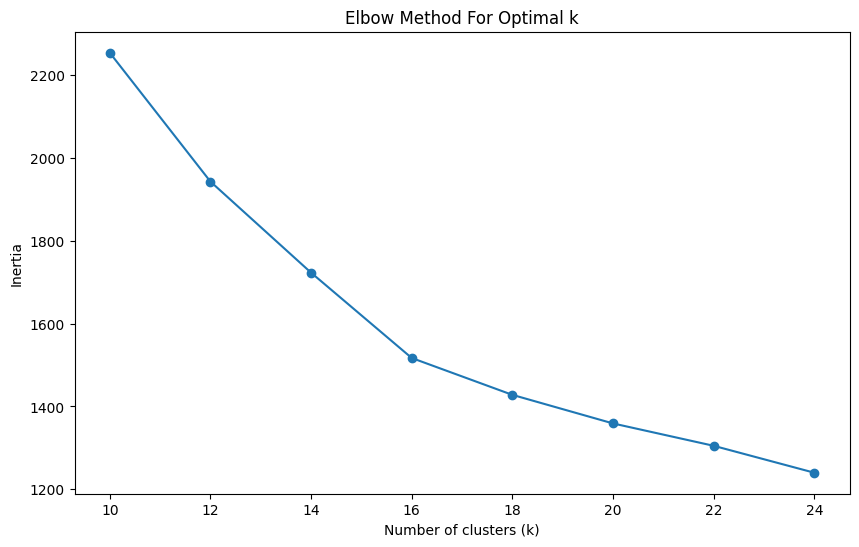

In [77]:
embeddings = embedding_model.encode(df['title'][0:25000], show_progress_bar=True)

ks = [10, 12, 14, 16, 18, 20, 22, 24]
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(ks, [a/1 for a in inertias], marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(False)
plt.show()


In [55]:
cluster_v2 = pd.DataFrame({'topic':topics_v2,'document':df['title'][0:25000]})
cluster_v2

,topic,document
0,-1,US Senators Threaten Metro Funding Over Chines...
1,-1,Supply Fundamentals Point To Continued Oil Rally
2,-1,Military assessment ruling out the need for a ...
3,4,Mahamilavat gang scared I will shut their shop...
4,-1,Residents lament waterfront noise nuisance - K...
...,...,...
24995,-1,Trump orders firing of US Secret Service chief
24996,-1,Trump orders firing of US Secret Service chief
24997,23,Tesla raising price of its full self-driving o...
24998,2,PREP BASEBALL: Simply Golden Bentonville junio...


In [56]:
topic_info_v2 = model_v2.get_topic_info()
topic_info_v2

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14267,-1_new_game_trump_thrones,"[new, game, trump, thrones, says, game thrones...",[Game of Thrones season 8: How to watch episod...
1,0,2005,0_man_school_police_year,"[man, school, police, year, murder, old, kille...",[32-year-old Greenfield man killed in officer-...
2,1,719,1_motley fool_motley_fool_earnings,"[motley fool, motley, fool, earnings, stocks, ...",[3 Top Restaurant Stocks to Buy in April -- Th...
3,2,574,2_sox_red sox_mets_red,"[sox, red sox, mets, red, instagram, baseball,...",[Red Sox Vs. Orioles Lineups: Christian Vazque...
4,3,520,3_easter_trudeau_alberta_emma,"[easter, trudeau, alberta, emma, canada, edmon...",[The Crown: Newcomer Emma Corrin cast as Princ...
5,4,490,4_election_elections_lok_lok sabha,"[election, elections, lok, lok sabha, sabha, b...",[Lok Sabha elections 2019: All you need to kno...
6,5,481,5_auburn_warriors_series_season,"[auburn, warriors, series, season, game, clipp...","[Final Four set, with Michigan State vs. Texas..."
7,6,473,6_avengers_endgame_avengers endgame_netflix,"[avengers, endgame, avengers endgame, netflix,...","[When to pee during Avengers: Endgame, Here’s ..."
8,7,384,7_assange_julian assange_trump_julian,"[assange, julian assange, trump, julian, biden...",[White House: Democrats Will ‘Never’ See Trump...
9,8,375,8_dame_notre_notre dame_cathedral,"[dame, notre, notre dame, cathedral, fire, dam...",[Catastrophic fire engulfs Notre Dame Cathedra...


In [57]:
model_v2.visualize_topics()

In [34]:
model_v2.visualize_documents(docs = df['title'][0:25000])

In [ ]:
import plotly.io as pio

fig = model_v2.visualize_documents(docs = df['title'][0:5000])
html_code = pio.to_html(fig, full_html=False)
pio.write_html(fig, 'plotly_graph.html')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(html_code)

4164882

In [ ]:
!pwd

/content/drive/MyDrive/Grover_dataset


In [58]:
model_v2.visualize_barchart(top_n_topics = 12, n_words = 15)

In [ ]:
model_v2.visualize_hierarchy()